## Earthquake analysis
Earthquake is a natural phenomenon whose occurrence predictability is always a hot topic.
In this project, we will analyze and visualize earthquake data from Greece from year 1965 until 2023 using libraries, statistical calculations and graphs.

In [26]:
# import libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
#load dataset
df = pd.read_csv("Earthquakes_v3.csv")

## Data Analysis & Cleaning

In [20]:
# Display the first 10 rows of database
df.head(10)

,DATETIME,LAT,LONG,DEPTH,MAGNITUDE
0,1/7/1965 10:22,36.50,26.50,10,5.3
1,1/10/1965 8:02,39.25,22.25,10,4.9
2,1/12/1965 17:26,37.00,22.00,10,4.0
3,1/15/1965 14:56,36.75,21.75,10,4.5
4,3/9/1965 19:16,39.00,24.00,10,4.2
5,3/9/1965 20:14,39.00,24.00,10,4.4
6,3/10/1965 0:04,39.00,24.00,10,4.8
7,3/10/1965 21:50,39.00,24.00,10,4.8
8,3/31/1965 12:01,38.50,21.75,10,5.1
9,4/3/1965 5:19,38.11,23.70,10,4.6


In [25]:
df.info

<bound method DataFrame.info of                DATETIME      LAT     LONG  DEPTH  MAGNITUDE
0        1/7/1965 10:22  36.5000  26.5000     10        5.3
1        1/10/1965 8:02  39.2500  22.2500     10        4.9
2       1/12/1965 17:26  37.0000  22.0000     10        4.0
3       1/15/1965 14:56  36.7500  21.7500     10        4.5
4        3/9/1965 19:16  39.0000  24.0000     10        4.2
...                 ...      ...      ...    ...        ...
285113  12/31/2023 9:11  38.2906  21.5401     24        1.3
285114  12/31/2023 9:41  38.2915  22.4519     12        1.5
285115  12/31/2023 1:53  38.4755  22.3659     13        1.4
285116  12/31/2023 2:32  38.2741  23.3217      6        1.4
285117  12/31/2023 3:37  35.4794  25.8517     26        1.8

[285118 rows x 5 columns]>

In [4]:
df.shape

(285118, 5)

*In this database there are 285118 rows and 5 columns.*

In [13]:
#Find the type of the data by column
print(df.dtypes)
df.dtypes.value_counts()

DATETIME      object
LAT          float64
LONG         float64
DEPTH          int64
MAGNITUDE    float64
dtype: object


float64    3
object     1
int64      1
Name: count, dtype: int64

*The database contains 285118 earthquakes that occurred in Greece.The first column ‘DATETIME’ indicates when the earthquake occurred. ‘LAT’ (Latitude) and ‘LONG’ (Longitude) tell us where the earthquake occurred. Finally, the earthquake is described by ‘DEPTH’ (km) and ‘MAGNITUDE’ (Richter Scale). The dataset contain both integers and float numbers.*

In [14]:
# Calculate some statistical data
df.describe()

,LAT,LONG,DEPTH,MAGNITUDE
count,285118.000000,285118.000000,285118.000000,285118.000000
mean,38.182137,22.778953,15.506183,2.122211
std,1.265518,1.740812,11.670270,0.816765
min,34.704900,19.290000,0.000000,0.000000
25%,37.770000,21.620000,9.000000,1.500000
50%,38.320000,22.310000,13.000000,2.000000
75%,38.800000,23.670000,18.000000,2.800000
max,41.550000,29.710000,244.000000,6.700000


In [7]:
#Check if in any missing values
df.isna().sum()

DATETIME     0
LAT          0
LONG         0
DEPTH        0
MAGNITUDE    0
dtype: int64

*There are no missing values.*

In [8]:
df.describe(include=['object'])

,DATETIME
count,285118
unique,279041
top,3/3/2021 13:06
freq,4


## Earthquake Visualization

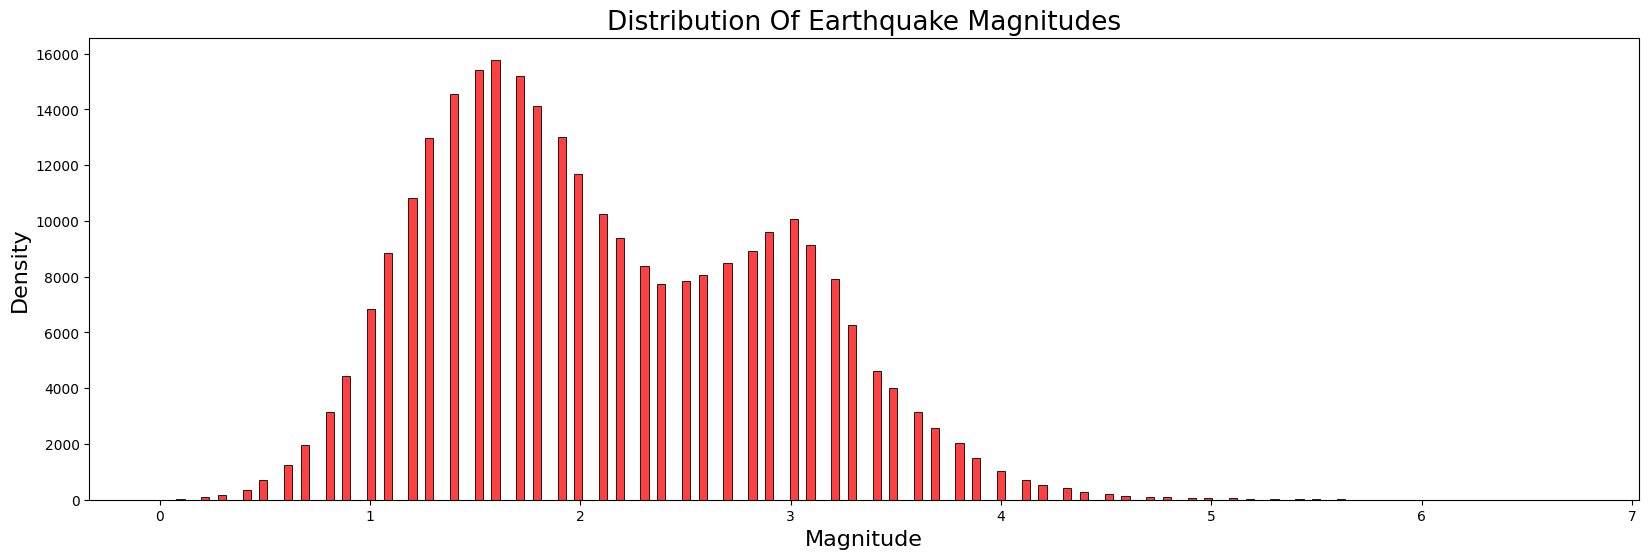

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,6))
ax = sns.histplot(df['MAGNITUDE'],label='Magnitude',color='red')
ax.set_title('Distribution Of Earthquake Magnitudes',fontsize=19)
ax.set_ylabel('Density',fontsize=16)
ax.set_xlabel('Magnitude',fontsize=16)

plt.show()

*At the magnitude distribution of earthquakes, we can see that most of them follow a bimodal distribution centered around 2.1 richter, with the majority of them occurring around 1.6 and 3 Richter.*

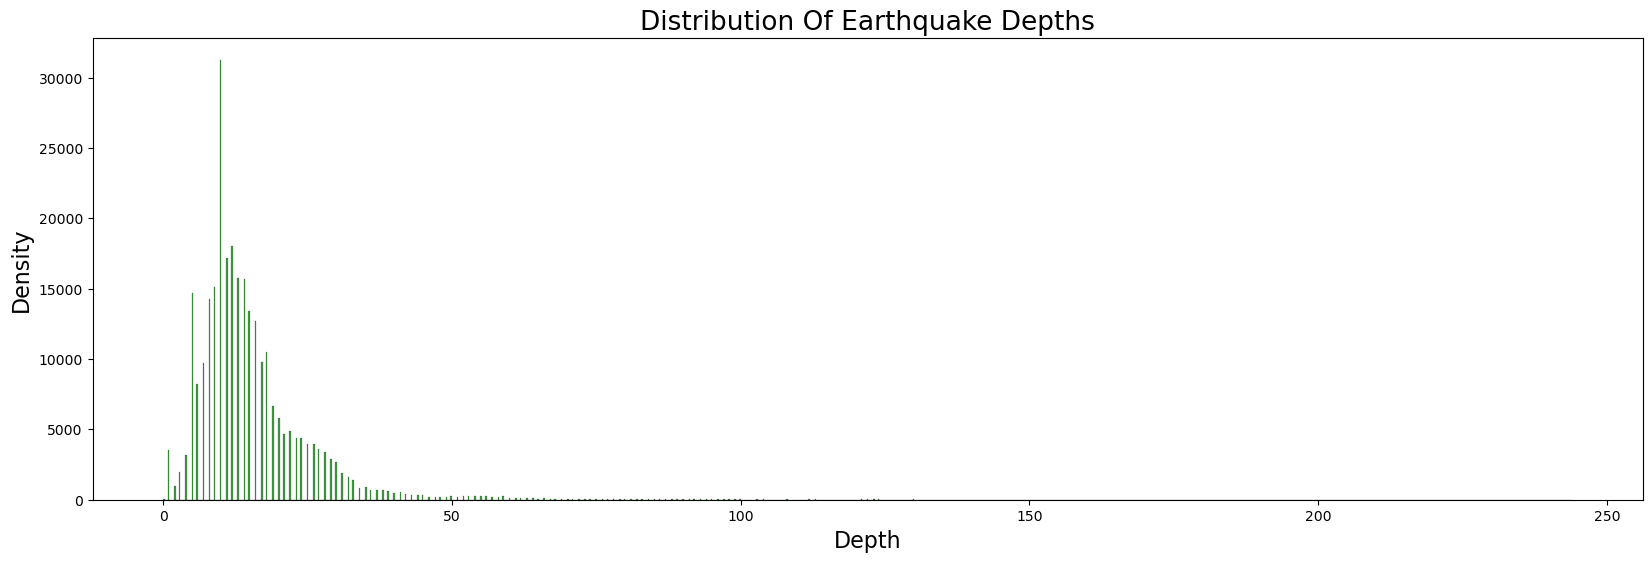

In [42]:
plt.figure(figsize=(20,6))
ax = sns.histplot(df['DEPTH'],label='Depth',color='green')
ax.set_title('Distribution Of Earthquake Depths',fontsize=19)
ax.set_ylabel('Density',fontsize=16)
ax.set_xlabel('Depth',fontsize=16)

plt.show()

*From the Distribution Of Earthquake Depths graph above, we can determine that an earthquake will most likely occur at a depth of 11-12 kilometres and a magnitude of 1.6 Richter.*